In [44]:
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [46]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [47]:
test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [48]:
train.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [49]:
test.isnull().sum()

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

In [50]:
# Numerical columns
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Annual Income'].fillna(train['Annual Income'].median(), inplace=True)
train['Health Score'].fillna(train['Health Score'].median(), inplace=True)
train['Credit Score'].fillna(train['Credit Score'].median(), inplace=True)

# Categorical columns
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Marital Status'].fillna(train['Marital Status'].mode()[0], inplace=True)
train['Occupation'].fillna(train['Occupation'].mode()[0], inplace=True)
# Number of Dependents
train['Number of Dependents'].fillna(0, inplace=True)
train['Dependents_missing'] = train['Number of Dependents'].isnull().astype(int)

# Previous Claims
train['Previous Claims'].fillna(0, inplace=True)
train['Claims_missing'] = train['Previous Claims'].isnull().astype(int)

# Vehicle Age
train['Vehicle Age'].fillna(train['Vehicle Age'].median(), inplace=True)
train['Insurance Duration'].fillna(train['Insurance Duration'].median(), inplace=True)
# Customer Feedback
train['Customer Feedback'].fillna(train['Customer Feedback'].mode()[0], inplace=True)
train['Feedback_missing'] = train['Customer Feedback'].isnull().astype(int)

# Check remaining missing values
missing_values_after = train.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values after handling:
 id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
Dependents_missing      0
Claims_missing          0
Feedback_missing        0
dtype: int64


In [51]:
# Fill missing values for numerical columns with median or mean
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Annual Income'].fillna(test['Annual Income'].mean(), inplace=True)
test['Health Score'].fillna(test['Health Score'].mean(), inplace=True)
test['Credit Score'].fillna(test['Credit Score'].median(), inplace=True)

# Fill missing values for categorical columns with mode or "Unknown"
test['Marital Status'].fillna(test['Marital Status'].mode()[0], inplace=True)
test['Occupation'].fillna('Unknown', inplace=True)  # Or use mode if applicable
test['Previous Claims'].fillna(0, inplace=True)  # Assuming 0 means no previous claims

# For columns with very few missing values, you may consider filling with a fixed value or mode
test['Insurance Duration'].fillna(test['Insurance Duration'].mode()[0], inplace=True)
test['Number of Dependents'].fillna(0, inplace=True)
test['Customer Feedback'].fillna(0, inplace=True)
test['Vehicle Age'].fillna(0, inplace=True)  # Corrected column name

# Check for missing values after imputation
print("Missing values after imputation:\n", test.isnull().sum())

# Optionally, drop columns with excessive missing values if necessary
# test.drop(columns=['Occupation', 'Previous Claims'], inplace=True)

# Confirm the final shape of the DataFrame
print("Final shape of the dataset:", test.shape)

Missing values after imputation:
 id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
dtype: int64
Final shape of the dataset: (800000, 20)


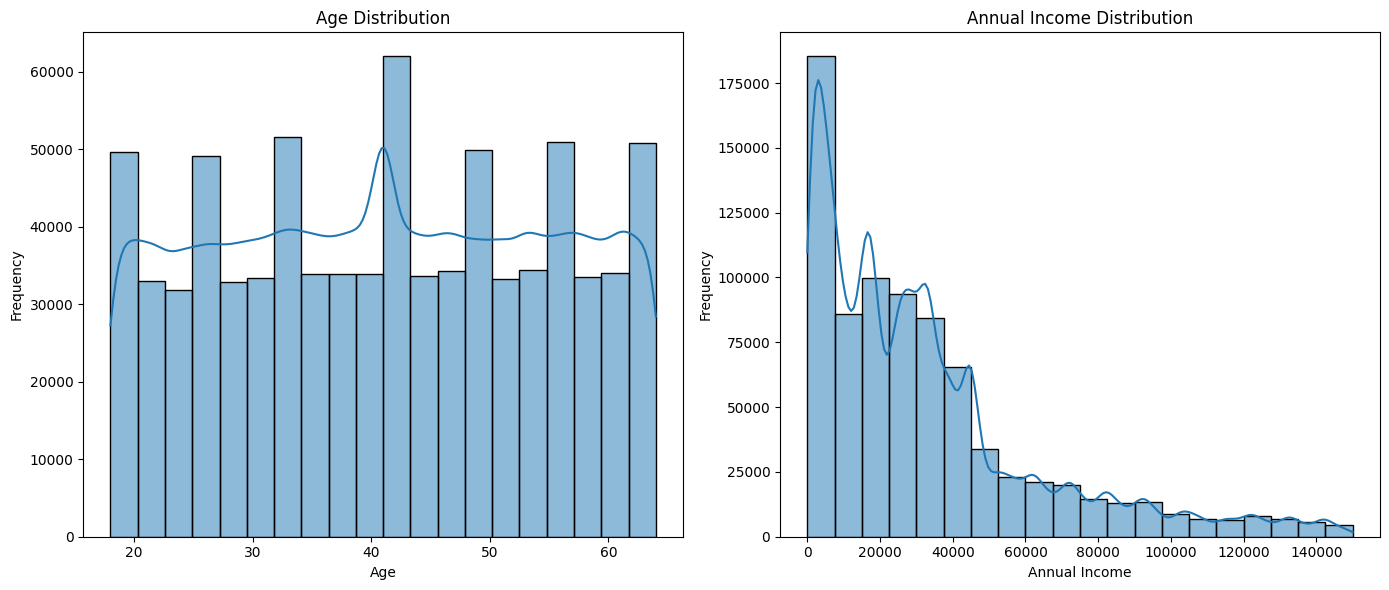

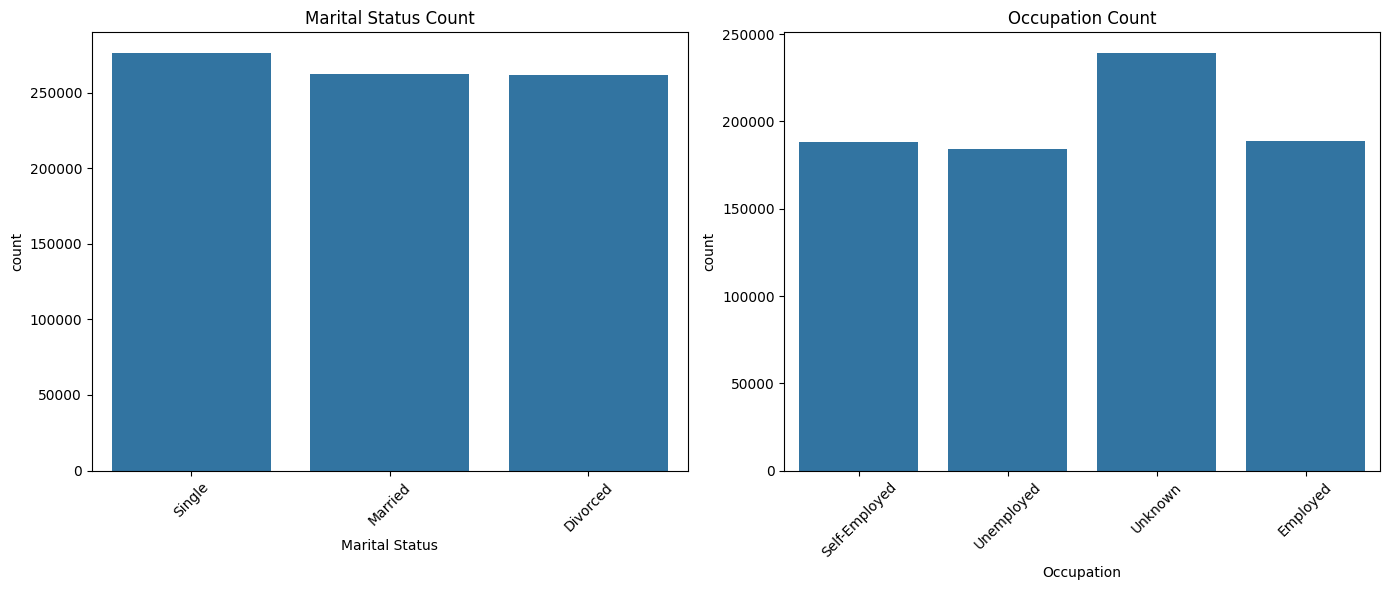

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'test' is your DataFrame
plt.figure(figsize=(14, 6))

# Histogram for numerical columns
plt.subplot(1, 2, 1)
sns.histplot(test['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(test['Annual Income'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Countplot for categorical columns
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Marital Status', data=test)
plt.title('Marital Status Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='Occupation', data=test)
plt.title('Occupation Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

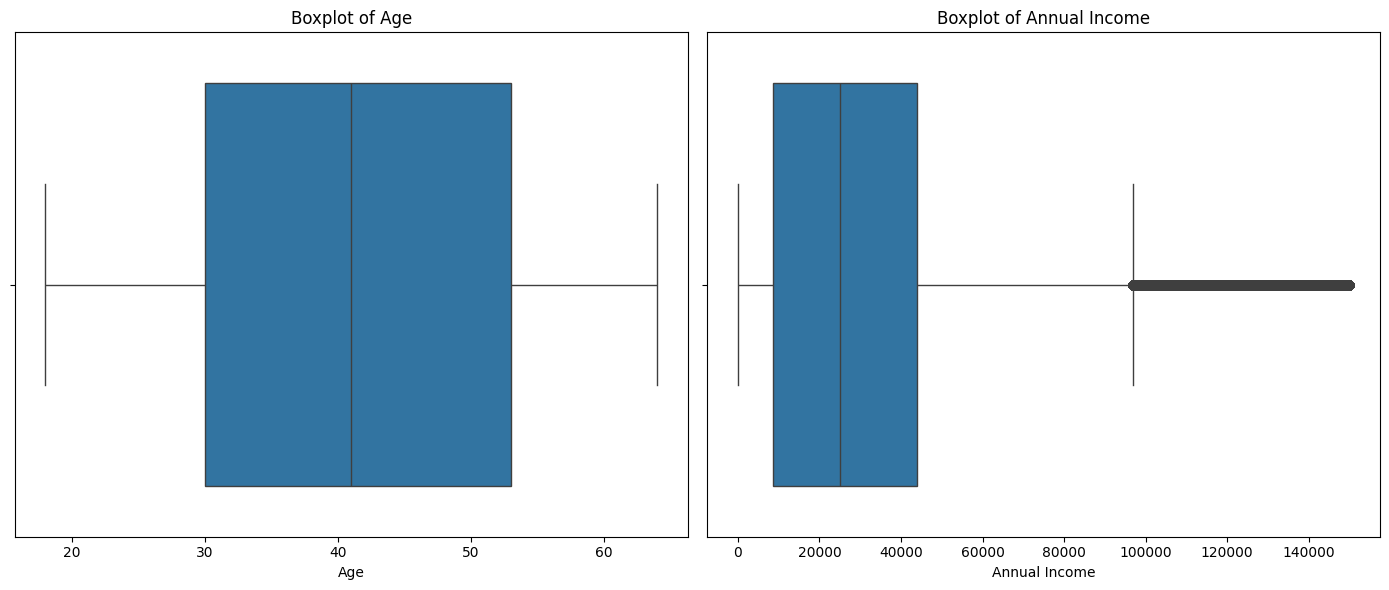

In [53]:
plt.figure(figsize=(14, 6))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=test['Age'])
plt.title('Boxplot of Age')

# Boxplot for Annual Income
plt.subplot(1, 2, 2)
sns.boxplot(x=test['Annual Income'])
plt.title('Boxplot of Annual Income')

plt.tight_layout()
plt.show()

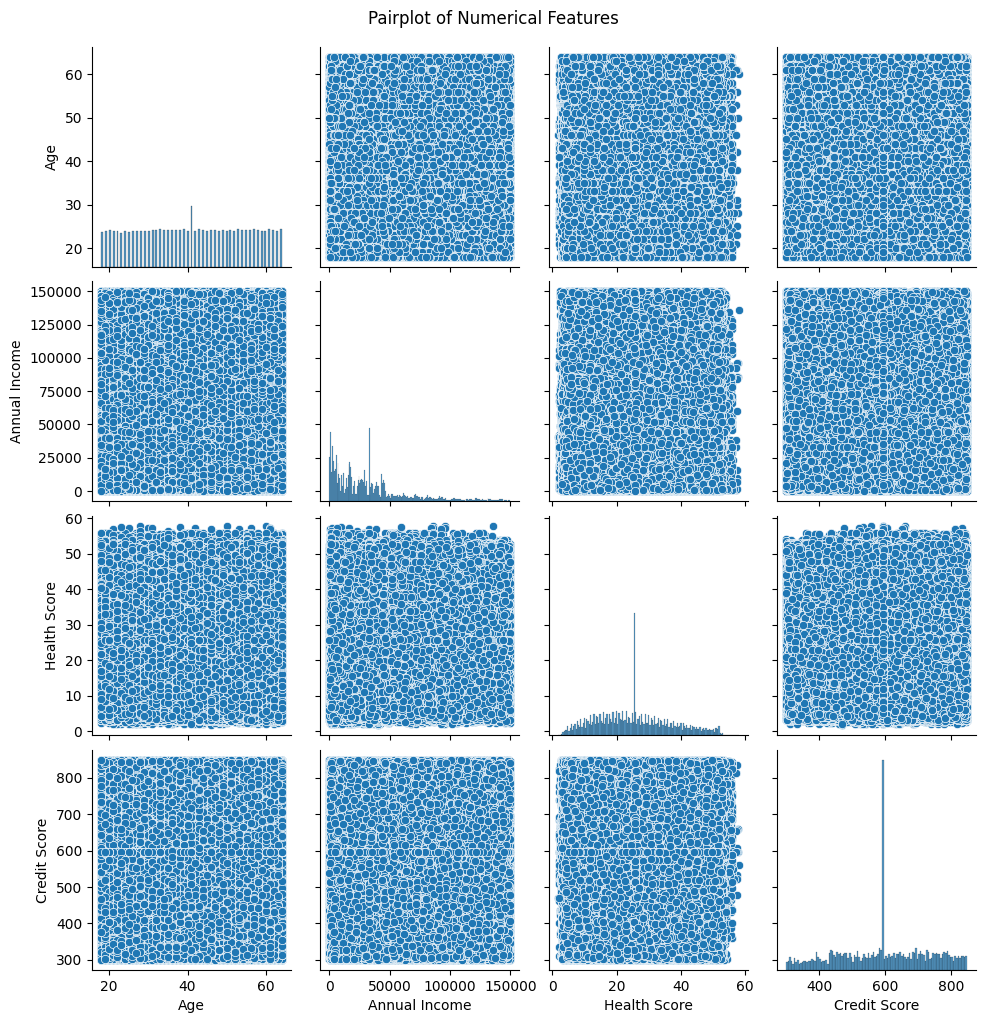

In [54]:
sns.pairplot(test[['Age', 'Annual Income', 'Health Score', 'Credit Score']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

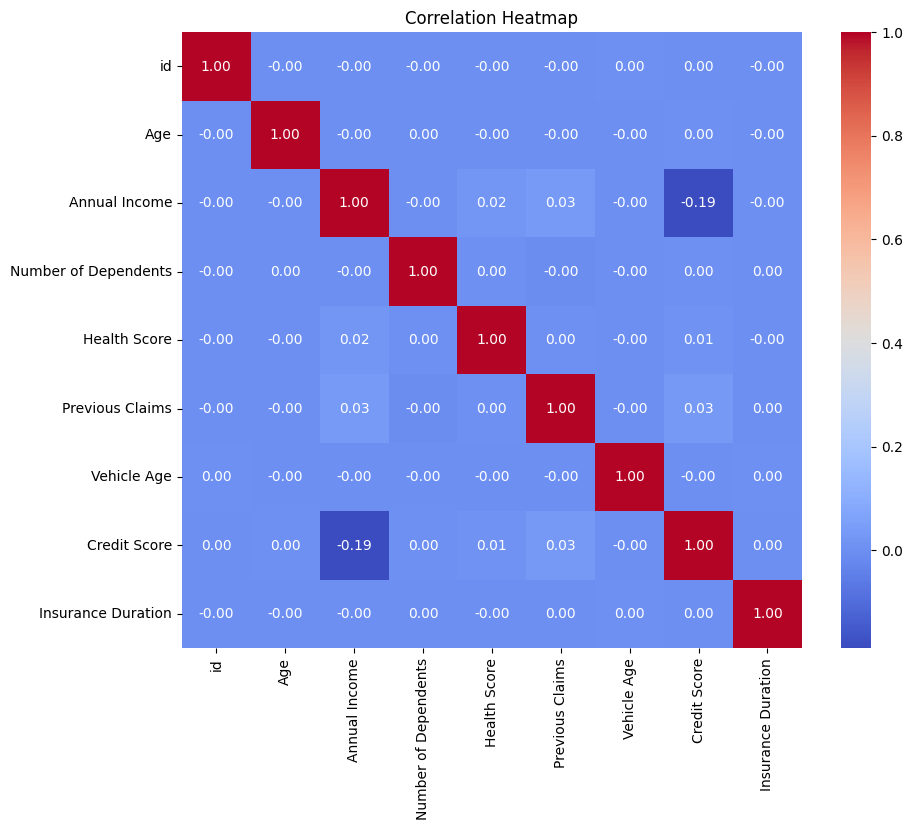

In [55]:
# Select only numeric columns for correlation
numeric_columns = test.select_dtypes(include=['number']).columns
correlation_matrix = test[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

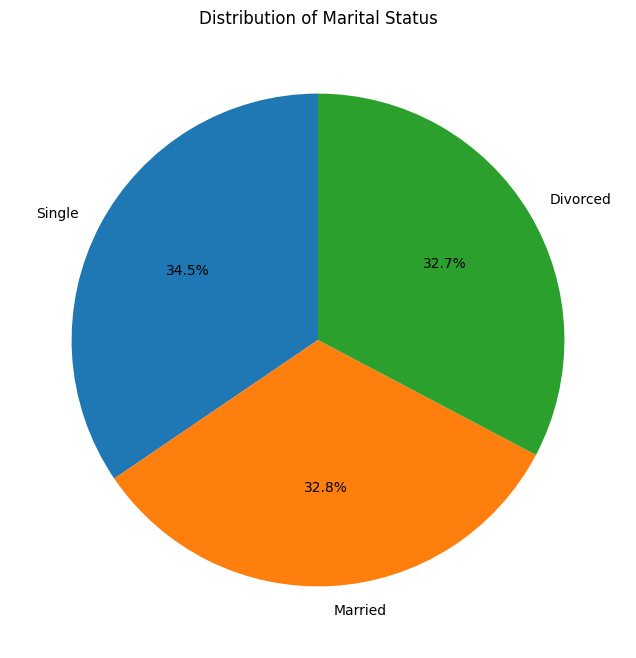

In [56]:
plt.figure(figsize=(8, 8))
test['Marital Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Marital Status')
plt.ylabel('')  # Hide the y-label
plt.show()

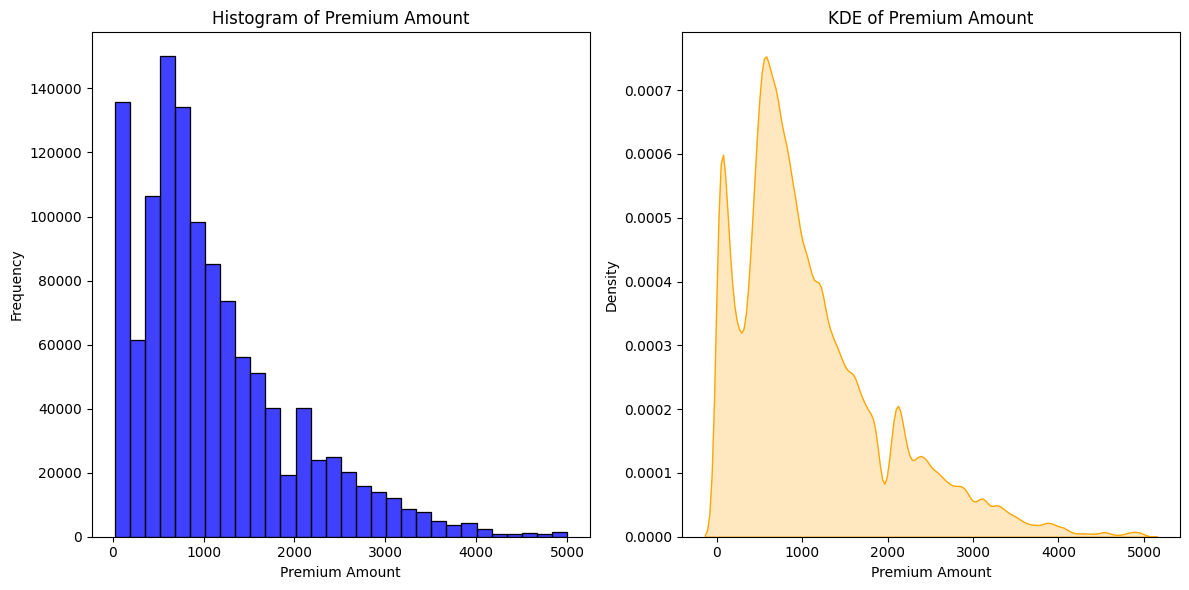

In [57]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(train['Premium Amount'], bins=30, kde=False, color='blue')
plt.title('Histogram of Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(train['Premium Amount'], color='orange', fill=True)
plt.title('KDE of Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Density')

# Show the plots
plt.tight_layout()
plt.show()

In [58]:
train.columns
test.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type'],
      dtype='object')

In [59]:
test.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type'],
      dtype='object')

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1200000 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1200000 non-null  float64
 4   Marital Status        1200000 non-null  object 
 5   Number of Dependents  1200000 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            1200000 non-null  object 
 8   Health Score          1200000 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       1200000 non-null  float64
 12  Vehicle Age           1200000 non-null  float64
 13  Credit Score          1200000 non-null  float64
 14  Insurance Duration    1200000 non-

In [61]:
from sklearn.preprocessing import LabelEncoder 

In [62]:
# Step 1: Identify categorical columns of type object
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

# Step 2: Convert categorical columns to numerical formats
label_encoder = LabelEncoder()

# Convert each categorical column to numerical
for col in categorical_columns:
    train[col] = label_encoder.fit_transform(train[col])

# Display the updated DataFrame and its types
print("\nUpdated DataFrame:")
print(train)
print("\nData Types:")
print(train.dtypes)

Categorical Columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

Updated DataFrame:
              id   Age  Gender  Annual Income  Marital Status  \
0              0  19.0       0        10049.0               1   
1              1  39.0       0        31678.0               0   
2              2  23.0       1        25602.0               0   
3              3  21.0       1       141855.0               1   
4              4  21.0       1        39651.0               2   
...          ...   ...     ...            ...             ...   
1199995  1199995  36.0       0        27316.0               1   
1199996  1199996  54.0       1        35786.0               0   
1199997  1199997  19.0       1        51884.0               0   
1199998  1199998  55.0       1        23911.0               2   
1199999  1199999  21.0       0        23911.0           

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1200000 non-null  float64
 2   Gender                1200000 non-null  int32  
 3   Annual Income         1200000 non-null  float64
 4   Marital Status        1200000 non-null  int32  
 5   Number of Dependents  1200000 non-null  float64
 6   Education Level       1200000 non-null  int32  
 7   Occupation            1200000 non-null  int32  
 8   Health Score          1200000 non-null  float64
 9   Location              1200000 non-null  int32  
 10  Policy Type           1200000 non-null  int32  
 11  Previous Claims       1200000 non-null  float64
 12  Vehicle Age           1200000 non-null  float64
 13  Credit Score          1200000 non-null  float64
 14  Insurance Duration    1200000 non-

In [64]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Dependents_missing,Claims_missing,Feedback_missing
0,0,19.0,0,10049.0,1,1.0,0,1,22.598761,2,...,5.0,145522,2,0,3,2,2869.0,0,0,0
1,1,39.0,0,31678.0,0,3.0,2,0,15.569731,0,...,2.0,127832,0,1,1,2,1483.0,0,0,0
2,2,23.0,1,25602.0,0,3.0,1,1,47.177549,1,...,3.0,137880,1,1,3,2,567.0,0,0,0
3,3,21.0,1,141855.0,1,2.0,0,0,10.938144,0,...,1.0,161517,2,1,0,0,765.0,0,0,0
4,4,21.0,1,39651.0,2,1.0,0,1,20.376094,0,...,4.0,76621,2,1,3,2,2022.0,0,0,0


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   800000 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         800000 non-null  float64
 4   Marital Status        800000 non-null  object 
 5   Number of Dependents  800000 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            800000 non-null  object 
 8   Health Score          800000 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       800000 non-null  float64
 12  Vehicle Age           800000 non-null  float64
 13  Credit Score          800000 non-null  float64
 14  Insurance Duration    800000 non-null  float64
 15  

In [66]:
# Step 1: Identify categorical columns of type object
categorical_columns1 = test.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns1)

# Step 2: Convert mixed-type columns to strings (if necessary)
for col in test.columns:
    if test[col].dtype == 'object' or test[col].dtype == 'int':
        test[col] = test[col].astype(str)

# Step 3: Initialize a LabelEncoder
label_encoder2 = LabelEncoder()

# Convert each categorical column to numerical
for col in categorical_columns:
    test[col] = label_encoder2.fit_transform(test[col])

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(test)

Categorical Columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']



Updated DataFrame:
             id   Age  Gender  Annual Income  Marital Status  \
0       1200000  28.0       0         2310.0               2   
1       1200001  31.0       0       126031.0               1   
2       1200002  47.0       0        17092.0               0   
3       1200003  28.0       0        30424.0               0   
4       1200004  24.0       1        10863.0               0   
...         ...   ...     ...            ...             ...   
799995  1999995  50.0       0        38782.0               1   
799996  1999996  41.0       0        73462.0               2   
799997  1999997  26.0       0        35178.0               2   
799998  1999998  34.0       0        45661.0               2   
799999  1999999  25.0       1        24843.0               0   

        Number of Dependents  Education Level  Occupation  Health Score  \
0                        4.0                0           1      7.657981   
1                        2.0                2           1    

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   800000 non-null  float64
 2   Gender                800000 non-null  int32  
 3   Annual Income         800000 non-null  float64
 4   Marital Status        800000 non-null  int32  
 5   Number of Dependents  800000 non-null  float64
 6   Education Level       800000 non-null  int32  
 7   Occupation            800000 non-null  int32  
 8   Health Score          800000 non-null  float64
 9   Location              800000 non-null  int32  
 10  Policy Type           800000 non-null  int32  
 11  Previous Claims       800000 non-null  float64
 12  Vehicle Age           800000 non-null  float64
 13  Credit Score          800000 non-null  float64
 14  Insurance Duration    800000 non-null  float64
 15  

In [68]:
test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,0,2310.0,2,4.0,0,1,7.657981,0,0,0.0,19.0,595.0,1.0,120713,3,1,3,2
1,1200001,31.0,0,126031.0,1,2.0,2,1,13.381379,1,2,0.0,14.0,372.0,8.0,148740,2,1,2,0
2,1200002,47.0,0,17092.0,0,0.0,3,2,24.354527,2,1,0.0,16.0,819.0,9.0,115368,1,1,1,1
3,1200003,28.0,0,30424.0,0,3.0,3,1,5.136225,1,1,1.0,3.0,770.0,5.0,133001,3,1,0,2
4,1200004,24.0,1,10863.0,0,2.0,1,2,11.844155,1,2,0.0,14.0,755.0,7.0,72367,1,0,3,2


In [69]:
# Step 1: Select numerical columns
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Display the numerical columns
print("Numerical Columns:")
print(train[numerical_columns])

Numerical Columns:
              id   Age  Annual Income  Number of Dependents  Health Score  \
0              0  19.0        10049.0                   1.0     22.598761   
1              1  39.0        31678.0                   3.0     15.569731   
2              2  23.0        25602.0                   3.0     47.177549   
3              3  21.0       141855.0                   2.0     10.938144   
4              4  21.0        39651.0                   1.0     20.376094   
...          ...   ...            ...                   ...           ...   
1199995  1199995  36.0        27316.0                   0.0     13.772907   
1199996  1199996  54.0        35786.0                   0.0     11.483482   
1199997  1199997  19.0        51884.0                   0.0     14.724469   
1199998  1199998  55.0        23911.0                   1.0     18.547381   
1199999  1199999  21.0        23911.0                   0.0     10.125323   

         Previous Claims  Vehicle Age  Credit Score  Ins

In [70]:
# Step 1: Select numerical columns
numerical_columns1 = test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Display the numerical columns
print("Numerical Columns:")
print(train[numerical_columns1])

Numerical Columns:
              id   Age  Annual Income  Number of Dependents  Health Score  \
0              0  19.0        10049.0                   1.0     22.598761   
1              1  39.0        31678.0                   3.0     15.569731   
2              2  23.0        25602.0                   3.0     47.177549   
3              3  21.0       141855.0                   2.0     10.938144   
4              4  21.0        39651.0                   1.0     20.376094   
...          ...   ...            ...                   ...           ...   
1199995  1199995  36.0        27316.0                   0.0     13.772907   
1199996  1199996  54.0        35786.0                   0.0     11.483482   
1199997  1199997  19.0        51884.0                   0.0     14.724469   
1199998  1199998  55.0        23911.0                   1.0     18.547381   
1199999  1199999  21.0        23911.0                   0.0     10.125323   

         Previous Claims  Vehicle Age  Credit Score  Ins

In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler

In [72]:
# Scaling numerical features
scaler = StandardScaler()
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])

In [73]:
print(train['Premium Amount'].isnull().sum())

0


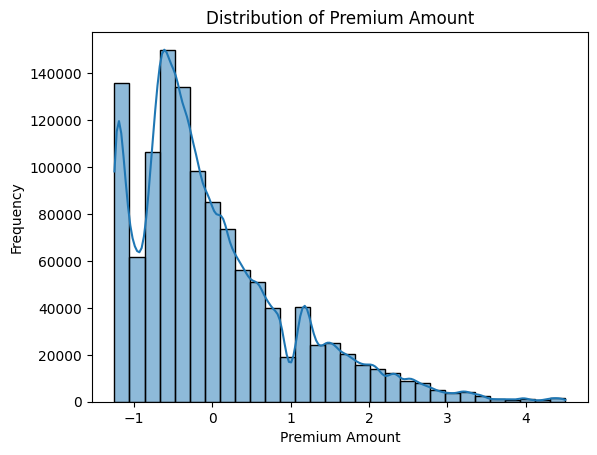

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train['Premium Amount'], bins=30, kde=True)
plt.title('Distribution of Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.show()

In [75]:
X = train.drop(['id', 'Premium Amount'], axis=1)
y = train['Premium Amount']


In [76]:
X

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Dependents_missing,Claims_missing,Feedback_missing
0,-1.648471,0,-0.707414,1,-0.562091,0,1,-0.249610,2,2,...,-1.567375,-0.007023,145522,2,0,3,2,0,0,0
1,-0.159711,0,-0.023289,0,0.798510,2,0,-0.844110,0,1,...,0.714630,-1.163391,127832,0,1,1,2,0,0,0
2,-1.350719,1,-0.215473,0,0.798510,1,1,1.829212,1,2,...,0.013020,-0.777935,137880,1,1,3,2,0,0,0
3,-1.499595,1,3.461605,1,0.118210,0,0,-1.235840,0,0,...,-1.602810,-1.548847,161517,2,1,0,0,0,0,0
4,-1.499595,1,0.228896,2,-0.562091,0,1,-0.437598,0,2,...,0.034281,-0.392479,76621,2,1,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,-0.383025,0,-0.161259,1,-1.242391,2,2,-0.996082,2,2,...,-1.567375,-0.777935,124181,2,0,0,0,0,0,0
1199996,0.956858,1,0.106646,0,-1.242391,2,1,-1.189716,0,1,...,0.027194,-0.392479,102449,2,0,3,0,0,0,0
1199997,-1.648471,1,0.615826,0,-1.242391,2,0,-0.915601,1,0,...,0.013020,0.378433,59151,1,0,1,1,0,0,0
1199998,1.031296,1,-0.268959,2,-0.562091,3,0,-0.592267,1,2,...,-1.319331,-0.392479,69979,2,0,0,0,0,0,0


In [77]:
y

0          2.042148
1          0.439833
2         -0.619128
3         -0.390226
4          1.062956
             ...   
1199995    0.231740
1199996   -0.325486
1199997   -0.845718
1199998   -0.585602
1199999    1.592436
Name: Premium Amount, Length: 1200000, dtype: float64

In [78]:
# Check for NaNs and negative values
print("Missing values in y:", y.isnull().sum())
print("Negative values in y:", (y < 0).sum())

mean_value = y[y >= 0].mean()
y = y.where(y >= 0, mean_value)  # Replace negative values with the mean

Missing values in y: 0
Negative values in y: 734809


In [79]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
X

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Dependents_missing,Claims_missing,Feedback_missing
0,-1.648471,0,-0.707414,1,-0.562091,0,1,-0.249610,2,2,...,-1.567375,-0.007023,145522,2,0,3,2,0,0,0
1,-0.159711,0,-0.023289,0,0.798510,2,0,-0.844110,0,1,...,0.714630,-1.163391,127832,0,1,1,2,0,0,0
2,-1.350719,1,-0.215473,0,0.798510,1,1,1.829212,1,2,...,0.013020,-0.777935,137880,1,1,3,2,0,0,0
3,-1.499595,1,3.461605,1,0.118210,0,0,-1.235840,0,0,...,-1.602810,-1.548847,161517,2,1,0,0,0,0,0
4,-1.499595,1,0.228896,2,-0.562091,0,1,-0.437598,0,2,...,0.034281,-0.392479,76621,2,1,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,-0.383025,0,-0.161259,1,-1.242391,2,2,-0.996082,2,2,...,-1.567375,-0.777935,124181,2,0,0,0,0,0,0
1199996,0.956858,1,0.106646,0,-1.242391,2,1,-1.189716,0,1,...,0.027194,-0.392479,102449,2,0,3,0,0,0,0
1199997,-1.648471,1,0.615826,0,-1.242391,2,0,-0.915601,1,0,...,0.013020,0.378433,59151,1,0,1,1,0,0,0
1199998,1.031296,1,-0.268959,2,-0.562091,3,0,-0.592267,1,2,...,-1.319331,-0.392479,69979,2,0,0,0,0,0,0


In [81]:
y

0          2.042148
1          0.439833
2          0.997350
3          0.997350
4          1.062956
             ...   
1199995    0.231740
1199996    0.997350
1199997    0.997350
1199998    0.997350
1199999    1.592436
Name: Premium Amount, Length: 1200000, dtype: float64

In [82]:
# Transform the target variable using log transformation
y_train_transformed = np.log1p(y_train)  # Log transformation for training set
y_val_transformed = np.log1p(y_val)      # Log transformation for validation set


In [83]:
X

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Dependents_missing,Claims_missing,Feedback_missing
0,-1.648471,0,-0.707414,1,-0.562091,0,1,-0.249610,2,2,...,-1.567375,-0.007023,145522,2,0,3,2,0,0,0
1,-0.159711,0,-0.023289,0,0.798510,2,0,-0.844110,0,1,...,0.714630,-1.163391,127832,0,1,1,2,0,0,0
2,-1.350719,1,-0.215473,0,0.798510,1,1,1.829212,1,2,...,0.013020,-0.777935,137880,1,1,3,2,0,0,0
3,-1.499595,1,3.461605,1,0.118210,0,0,-1.235840,0,0,...,-1.602810,-1.548847,161517,2,1,0,0,0,0,0
4,-1.499595,1,0.228896,2,-0.562091,0,1,-0.437598,0,2,...,0.034281,-0.392479,76621,2,1,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,-0.383025,0,-0.161259,1,-1.242391,2,2,-0.996082,2,2,...,-1.567375,-0.777935,124181,2,0,0,0,0,0,0
1199996,0.956858,1,0.106646,0,-1.242391,2,1,-1.189716,0,1,...,0.027194,-0.392479,102449,2,0,3,0,0,0,0
1199997,-1.648471,1,0.615826,0,-1.242391,2,0,-0.915601,1,0,...,0.013020,0.378433,59151,1,0,1,1,0,0,0
1199998,1.031296,1,-0.268959,2,-0.562091,3,0,-0.592267,1,2,...,-1.319331,-0.392479,69979,2,0,0,0,0,0,0


In [84]:
y

0          2.042148
1          0.439833
2          0.997350
3          0.997350
4          1.062956
             ...   
1199995    0.231740
1199996    0.997350
1199997    0.997350
1199998    0.997350
1199999    1.592436
Name: Premium Amount, Length: 1200000, dtype: float64

In [85]:
print(y.isnull().sum())

0


In [86]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Sample training data

In [87]:
# Initialize models
models = {
    'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, verbose=0),
    'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1)
}

results = {}

In [88]:
# Model training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train_transformed)
    val_predictions = model.predict(X_val)
    
    # Clip negative predictions to zero
    val_predictions_clipped = np.clip(val_predictions, a_min=0, a_max=None)
    
    # Calculate metrics
    mse = mean_squared_error(y_val, val_predictions_clipped)
    mae = mean_absolute_error(y_val, val_predictions_clipped)
    
    results[name] = {'MSE': mse, 'MAE': mae}


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 19
[LightGBM] [Info] Start training from score 0.659465


In [89]:
from sklearn.model_selection import cross_val_score

results = {}

# Model training and evaluation
for name, model in models.items():
    print(f"Training model: {name}")
    
    # Use cross-validation to evaluate the model
    cv_scores = cross_val_score(model, X_train, y_train_transformed, cv=5, scoring='neg_mean_squared_error')
    
    # Convert scores to positive MSE
    mse = -cv_scores.mean()
    results[name] = {'MSE': mse}
    
    print(f"Model: {name}, MSE (CV): {mse:.4f}")

# You can also add MAE or other metrics as needed

Training model: CatBoost
Model: CatBoost, MSE (CV): 0.0609
Training model: LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 768000, number of used features: 19
[LightGBM] [Info] Start training from score 0.659446
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 768000, number of used features

In [90]:
# Model training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train_transformed)
    val_predictions = model.predict(X_val)
    
    # Clip negative predictions to zero
    val_predictions_clipped = np.clip(val_predictions, a_min=0, a_max=None)
    
    # Calculate metrics
    mse = mean_squared_error(y_val, val_predictions_clipped)
    mae = mean_absolute_error(y_val, val_predictions_clipped)
    
    results[name] = {'MSE': mse, 'MAE': mae}


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 19
[LightGBM] [Info] Start training from score 0.659465


In [91]:
print(y.isnull().sum())

0


In [92]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

               MSE       MAE
CatBoost  0.396222  0.461832
LightGBM  0.393288  0.460035
XGBoost   0.393663  0.460155


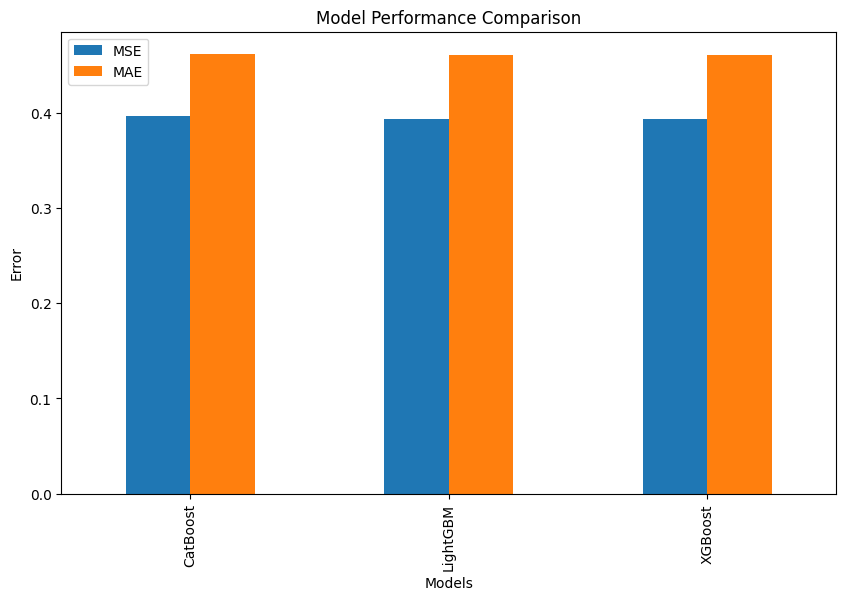

In [93]:
# Visualize the results
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Error')
plt.xlabel('Models')
plt.show()

In [94]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train_transformed, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-np.mean(cv_scores)}")

Cross-validated MSE: 0.06027335505385404


In [95]:
final_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3)
final_model.fit(X_train, y_train)  # Use combined training data

0:	learn: 0.5382342	total: 77ms	remaining: 7.62s
1:	learn: 0.5371000	total: 147ms	remaining: 7.22s
2:	learn: 0.5361737	total: 217ms	remaining: 7.03s
3:	learn: 0.5354034	total: 286ms	remaining: 6.86s
4:	learn: 0.5347902	total: 404ms	remaining: 7.67s
5:	learn: 0.5342717	total: 497ms	remaining: 7.79s
6:	learn: 0.5338641	total: 657ms	remaining: 8.73s
7:	learn: 0.5335075	total: 765ms	remaining: 8.79s
8:	learn: 0.5332182	total: 902ms	remaining: 9.12s
9:	learn: 0.5329613	total: 1.03s	remaining: 9.25s
10:	learn: 0.5327540	total: 1.21s	remaining: 9.79s
11:	learn: 0.5325803	total: 1.32s	remaining: 9.7s
12:	learn: 0.5324448	total: 1.44s	remaining: 9.63s
13:	learn: 0.5323143	total: 1.61s	remaining: 9.9s
14:	learn: 0.5322100	total: 1.71s	remaining: 9.68s
15:	learn: 0.5319765	total: 1.8s	remaining: 9.44s
16:	learn: 0.5319040	total: 1.92s	remaining: 9.37s
17:	learn: 0.5318402	total: 2s	remaining: 9.13s
18:	learn: 0.5315093	total: 2.08s	remaining: 8.87s
19:	learn: 0.5312511	total: 2.16s	remaining: 8.6

In [97]:

test_predictions = final_model.predict(test)

# Clip negative predictions to zero
test_predictions_clipped = np.clip(test_predictions, a_min=0, a_max=None)

# Create a submission DataFrame
submission = pd.DataFrame({
    'Id': range(1, len(test_predictions_clipped) + 1),  # Example ID column
    'Prediction': test_predictions_clipped
})

# Save to CSV
submission.to_csv('final_submission.csv', index=False)
print("Final submission file created: final_submission.csv")

Final submission file created: final_submission.csv


In [ ]:
dr